# 2. 출생아 수 및 합계출산율

In [1]:
import pandas as pd
df=pd.read_excel('stat_142801.xls', skiprows=2, nrows=2, index_col=0)
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,444.800,470.200,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.149,1.226,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [2]:
# df.loc['출생아 수'] # 오류가 뜬다.

In [3]:
df.index.values # 더 정확한 인덱스를 확인하면 아래와 같다.

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [4]:
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'},inplace=True) # rename( )으로 이름을 바꿔준다.
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,444.800,470.200,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.149,1.226,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [5]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [6]:
df.loc['출생아 수']

2009    444.8
2010    470.2
2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [7]:
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,444.800,470.200,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.149,1.226,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


### 데이터의 rows와 columns을 바꾸기

In [8]:
df=df.T
df

,출생아 수,합계 출산율
2009,444.8,1.149
2010,470.2,1.226
2011,471.3,1.244
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977


### 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['axes.unicode_minus']=False 

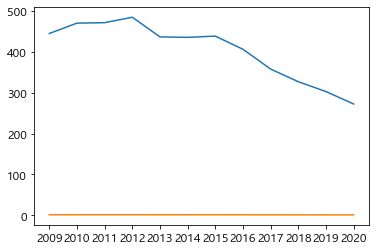

In [10]:
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index,df['합계 출산율'])
plt.show()

### x축을 공유하며 y축을 다르게 하는 그래프
출생아 수와 합계출산율은 숫자의 범위차이가 커서 그래프상에서 차이를 알아보기 힘드므로 x축을 공유하면서 y축의 범위를 다르게 설정한다.  
#### twinx( ) 사용

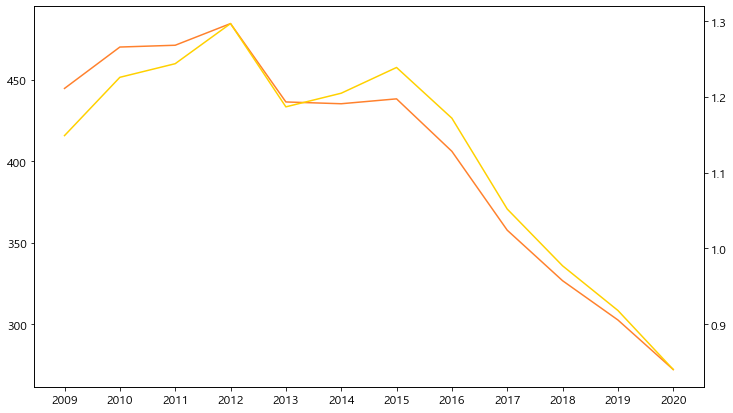

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1. twinx() # x축을 공유하는 쌍둥이 axis
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')
plt.show()

#### twinx( ) 를 막대그래프, 꺾은선 그래프 서로다르게

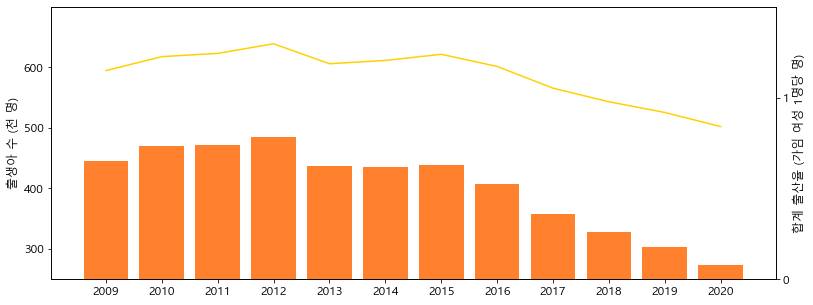

In [12]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
ax1.set_ylim(250,700)
ax1.set_yticks([300, 400, 500, 600])

ax2 = ax1. twinx() # x축을 공유하는 쌍둥이 axis

ax2.plot(df.index, df['합계 출산율'], color='#ffd100')
ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
plt.show()

#### 각 막대, marker에 텍스트(숫자) 넣기

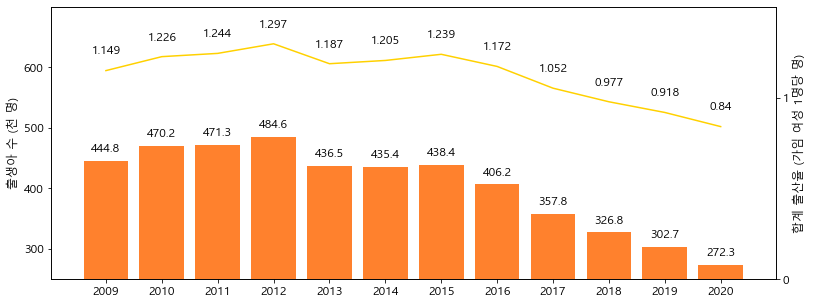

In [13]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
ax1.set_ylim(250,700)
ax1.set_yticks([300, 400, 500, 600])

for idx,val in enumerate(df['출생아 수']):
    ax1.text(idx,val+15, val, ha='center')

ax2 = ax1. twinx() # x축을 공유하는 쌍둥이 axis

ax2.plot(df.index, df['합계 출산율'], color='#ffd100')
ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val+0.09, val, ha='center')

plt.show()

#### 스타일 넣기
선 굵기, marker, marker edge 색 등 

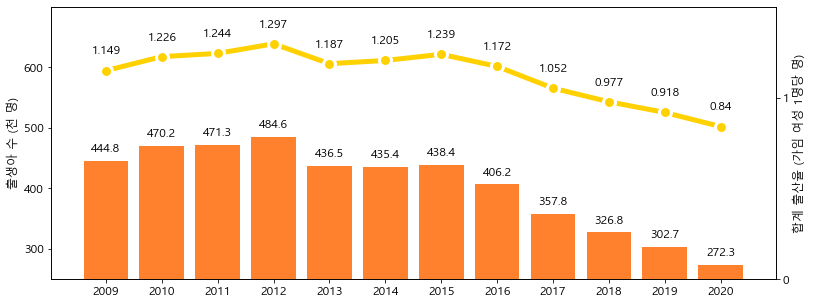

In [39]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
ax1.set_ylim(250,700)
ax1.set_yticks([300, 400, 500, 600])

for idx,val in enumerate(df['출생아 수']):
    ax1.text(idx,val+15, val, ha='center')

ax2 = ax1. twinx() # x축을 공유하는 쌍둥이 axis

ax2.plot(df.index, df['합계 출산율'], color='#ffd100',marker='o', ms=12, lw= 5, markeredgecolor='w', markeredgewidth=3)
ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val+0.09, val, ha='center')

plt.show()

#### 제목 넣기

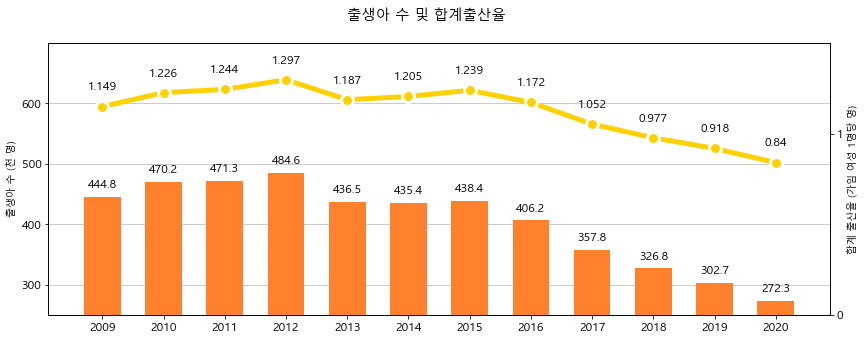

In [53]:
fig, ax1 = plt.subplots(figsize=(14, 5))
fig.suptitle('출생아 수 및 합계출산율')
ax1.set_ylabel('출생아 수 (천 명)', size=10)
ax1.bar(df.index, df['출생아 수'], color='#ff812d', width=0.6,zorder=3)
ax1.grid(axis='y', alpha=0.8, zorder=0) # grid를 제일 뒤로 보내기위해 zorder=0 설정
ax1.set_ylim(250,700)
ax1.set_yticks([300, 400, 500, 600])

for idx,val in enumerate(df['출생아 수']):
    ax1.text(idx,val+15, val, ha='center')

ax2 = ax1. twinx() # x축을 공유하는 쌍둥이 axis

ax2.plot(df.index, df['합계 출산율'], color='#ffd100',marker='o', ms=12, lw= 5, markeredgecolor='w', markeredgewidth=3)
ax2.set_ylabel('합계 출산율 (가임 여성 1명당 명)',size=10)
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val+0.09, val, ha='center')
    
plt.savefig('출생아 수 및 합계출산율 2009-2020.png',dpi=100)   
plt.show()